In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import re

### Flight Price Prediction


<u>`Problem Statement:`</u>

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

- Size of training set: 10683 records

- Size of test set: 2671 records


<u>`FEATURES:`</u>

- Airline: The name of the airline.

- Date_of_Journey: The date of the journey

- Source: The source from which the service begins.

- Destination: The destination where the service ends.

- Route: The route taken by the flight to reach the destination.

- Dep_Time: The time when the journey starts from the source.

- Arrival_Time: Time of arrival at the destination.

- Duration: Total duration of the flight.

- Total_Stops: Total stops between the source and destination.

- Additional_Info: Additional information about the flight

<u>`Target/label column:-`</u>

    * Price: The price of the ticket

 

##### Train Data:-

In [2]:
FPtrain = pd.read_excel("Data_Train.xlsx")

In [3]:
FPtrain.head(50)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [4]:
FPtrain.shape

(10683, 11)

##### Test Data:-

In [5]:
FPtest=pd.read_excel("Test_set.xlsx")
FPtest.head(50)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


In [6]:
FPtest.shape

(2671, 10)

##### Null values check

In [7]:
FPtrain.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

1 null vallues in 'Route' and 'Total_Stops' Each columns of Train dataset.

In [8]:
FPtest.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

 No null values in test dataset.

##### droping the null value from the train dataset:-

In [9]:
FPtrain.dropna(inplace=True)

In [10]:
FPtrain.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
FPtrain.shape

(10682, 11)

In [12]:
FPtrain.reset_index(inplace=True, drop=True)

### Performing EDA on the given dataset to get more info:-

In [13]:
FPtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


- Date_of_Journey is "Date" type data
- Dep_Time is "Time" type Data
- Arrival_Time is "Time" type Data
- Duration is "Time" type Data
- Rest dataset are "Object" type data

In [14]:
FPtrain.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

### Interpreting the relationship between Independent and Dependent variables:-

##### Target Column:

<AxesSubplot:xlabel='Price', ylabel='Density'>

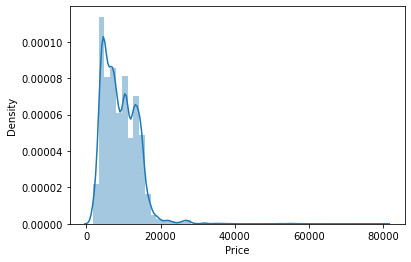

In [15]:
sns.distplot(FPtrain.Price)

Price Data is skewed

In [16]:
FPtrain.Price.describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [17]:
FPtrain.Price.skew()

1.812404554693161

#### Feature Columns:

In [18]:
FPtrain.dtypes[FPtrain.dtypes== 'object']

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [19]:
FPtrain['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='count'>

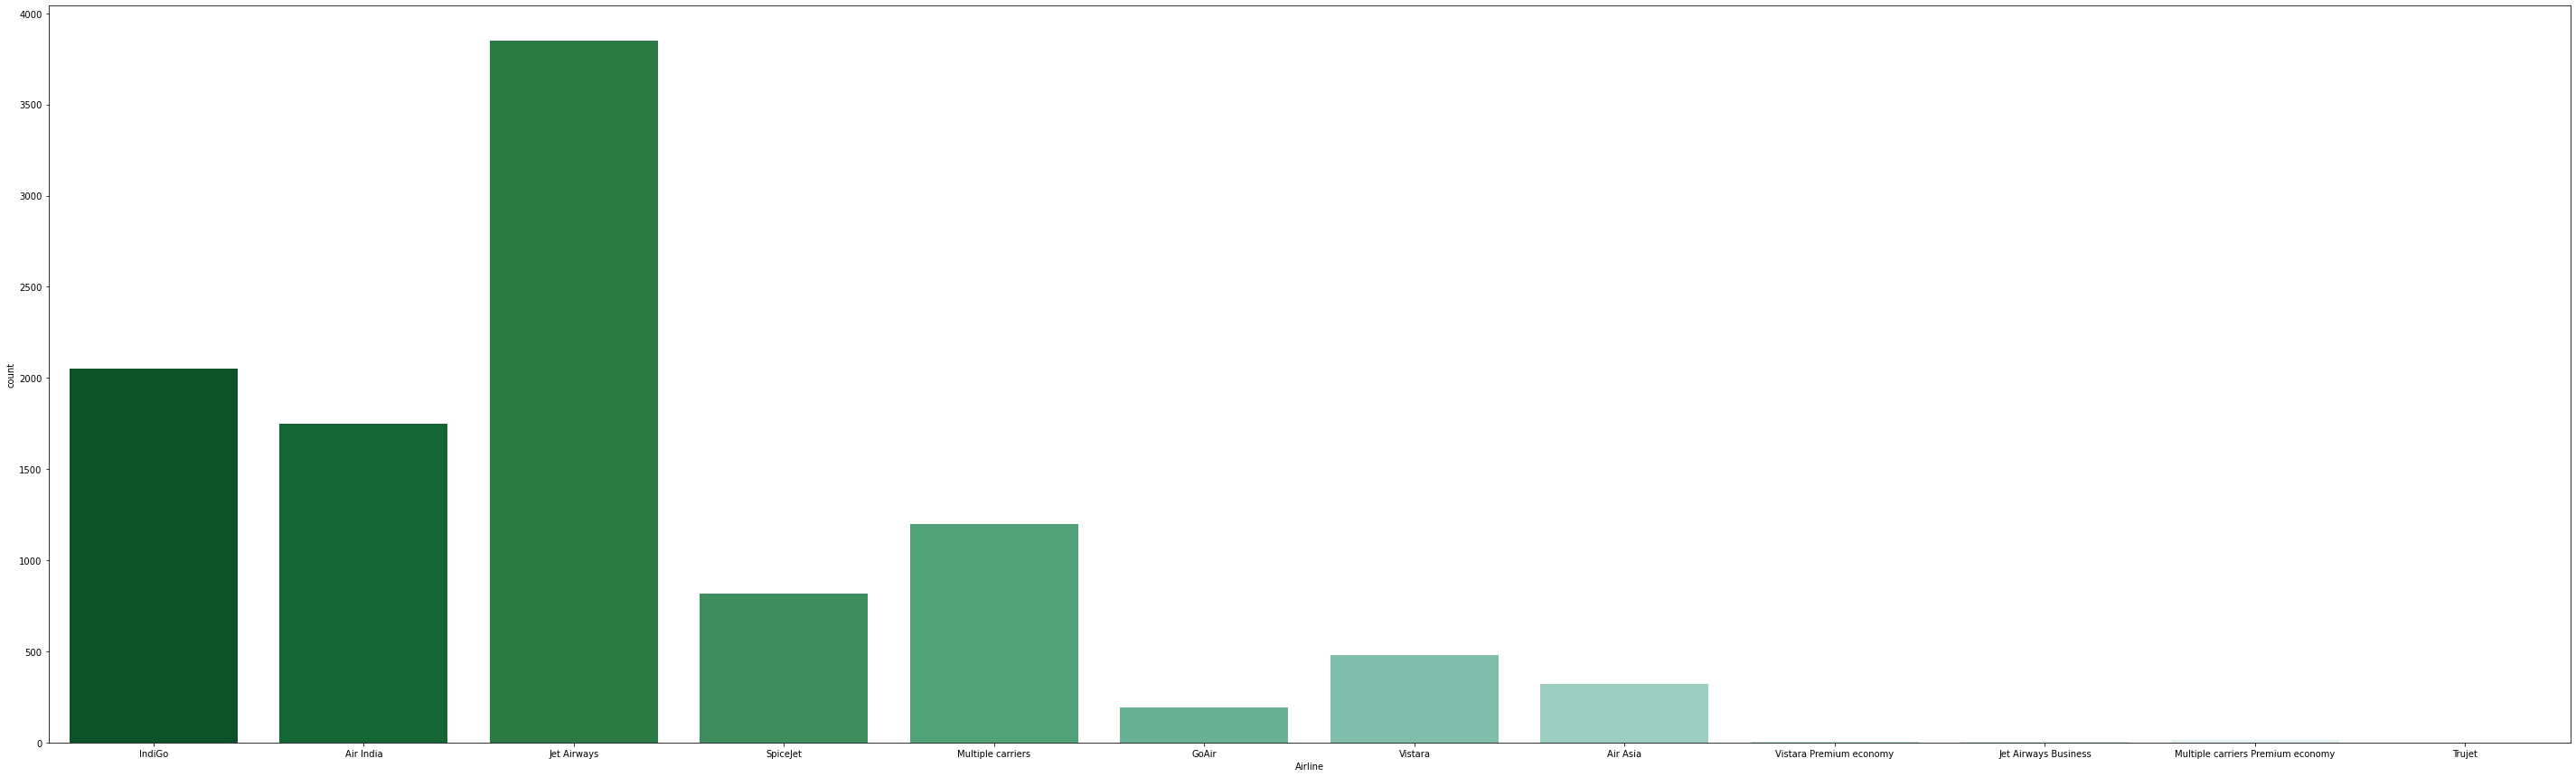

In [20]:
plt.figure(figsize=(50,15))
sns.countplot(FPtrain['Airline'], palette="BuGn_r")

 Maximum flights are from "Jet Airways" followed by "IndiGo" and then "Air India"

In [21]:
FPtrain['Date_of_Journey'].value_counts()

18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     281
1/05/2019     277
12/05/2019    259
1/04/2019     257
3/03/2019     218
9/03/2019     200
15/03/2019    162
18/03/2019    156
01/03/2019    152
12/03/2019    142
9/04/2019     125
3/04/2019     110
21/06/2019    109
18/06/2019    105
09/03/2019    102
6/04/2019     100
03/03/2019     97
06/03/2019     95
27/04/2019     94
24/04/2019     92
3/05/2019      90
15/04/2019     89
21/04/2019     82
18/04/2019     67
12/04/2019     63
1/03/2019      47
Name: Date_of_Journey, dtype: int64

<AxesSubplot:xlabel='Date_of_Journey', ylabel='count'>

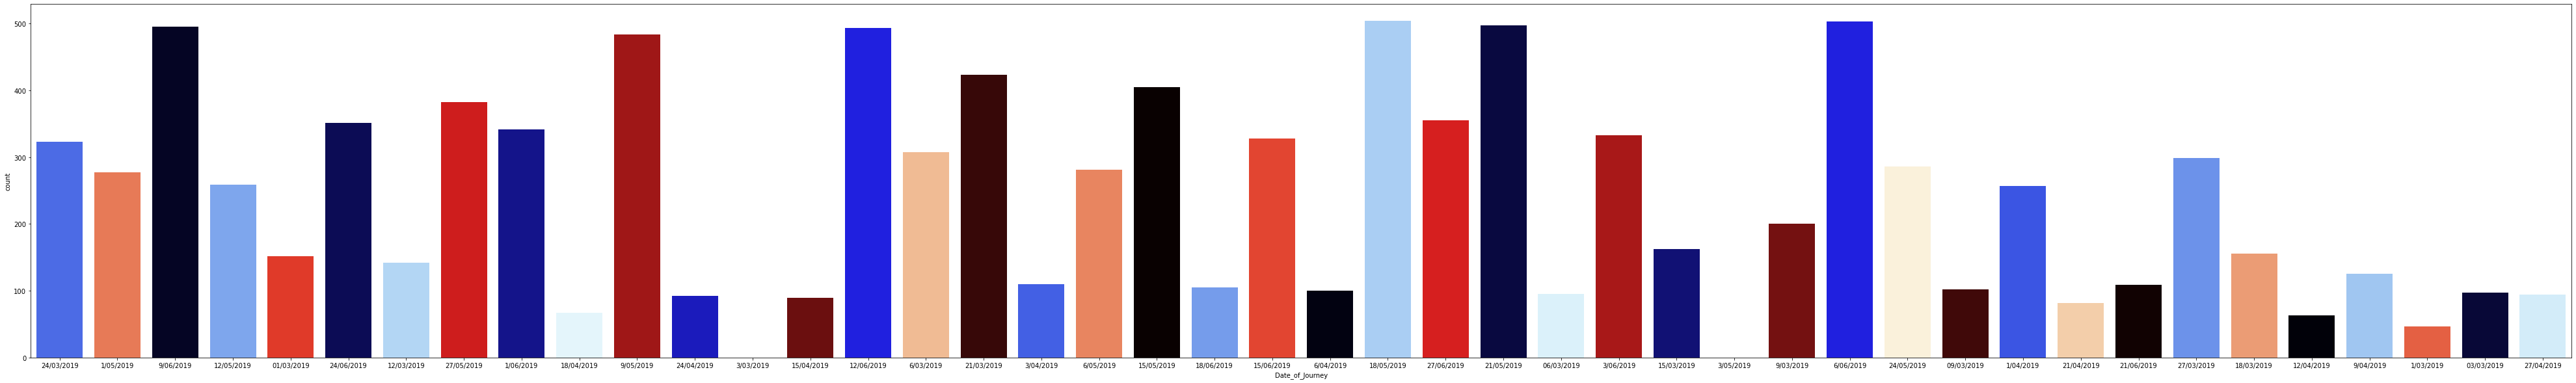

In [22]:
plt.figure(figsize=(70,10))
sns.countplot(FPtrain['Date_of_Journey'], palette="flag_r")

In [23]:
FPtrain['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

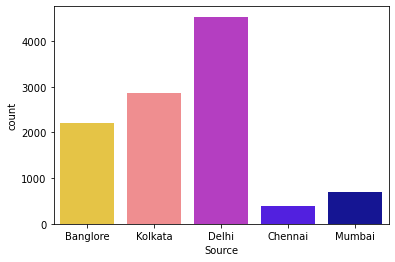

In [24]:
sns.countplot(FPtrain['Source'], palette="gnuplot2_r")

#### Most flights are from Delhi and least from Chennai

<AxesSubplot:xlabel='Destination', ylabel='count'>

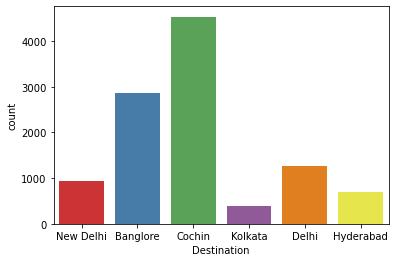

In [25]:
sns.countplot(FPtrain['Destination'], palette='Set1')

#### Most flights are going to Cochin and least to Kolkata.

In [26]:
FPtrain['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [27]:
FPtrain['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

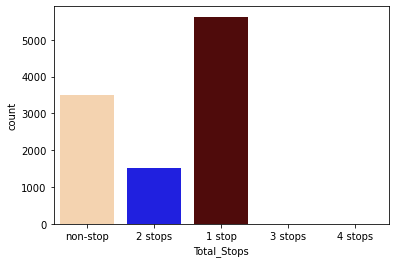

In [28]:
sns.countplot(FPtrain['Total_Stops'], palette="flag_r")

In [29]:
FPtrain['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [30]:
FPtrain['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
BLR → HBX → BOM → NAG → DEL       1
BLR → HBX → BOM → BHO → DEL       1
BOM → DED → DEL → HYD             1
BOM → RPR → VTZ → HYD             1
CCU → RPR → HYD → BLR             1
Name: Route, Length: 128, dtype: int64

In [31]:
FPtrain['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [32]:
FPtrain['Dep_Time'].value_counts()

18:55    233
17:00    227
07:05    205
10:00    203
07:10    202
        ... 
12:05      1
01:35      1
21:40      1
12:45      1
22:25      1
Name: Dep_Time, Length: 222, dtype: int64

In [33]:
FPtrain['Arrival_Time'].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '06:50 10 Mar',
       '00:05 19 Mar', '21:20 13 Mar'], dtype=object)

In [34]:
FPtrain['Arrival_Time'].value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:55 10 Mar      1
14:40             1
12:35 02 May      1
02:45 02 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [35]:
FPtrain['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [36]:
FPtrain['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
47h 40m      1
29h 30m      1
13h 35m      1
33h 20m      1
42h 5m       1
Name: Duration, Length: 368, dtype: int64

In [37]:
FPtrain['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [38]:
FPtrain['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [39]:
((FPtrain['Additional_Info']== 'No info').sum() + (FPtrain['Additional_Info']== 'No Info').sum())/FPtrain.Additional_Info.count()*100

78.14079760344505

In the "Additional info" column 78% of data is missing the info. The column has very less effect on the accuracy of the dataset, will drop the column.

#### Finding the relationship b/w Dependent and independant variables.

Text(0.5, 1.0, 'Price Trend Based on DOJ')

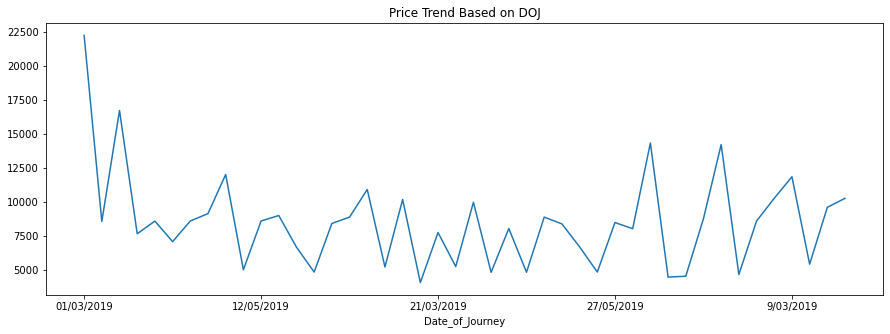

In [40]:
plt.figure(figsize=(15,5))
FPtrain.groupby('Date_of_Journey').median()['Price'].plot()
plt.title('Price Trend Based on DOJ')

Graph shows highest price in "March" and then it decline in continuously.

###### Creating New columns for "Day" and "Month" from 'Date' Column:

In [41]:
FPtrain['Date_of_Journey']=pd.to_datetime(FPtrain['Date_of_Journey'])

In [42]:
FPtrain['Day']=FPtrain['Date_of_Journey'].apply(lambda d:d.day)

In [43]:
FPtrain['Month']=FPtrain['Date_of_Journey'].apply(lambda m:m.month)

In [44]:
FPtrain

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10678,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10679,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10680,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


##### Droping columns which are not usefull for making a good model for predecting the Target varaiable values.

In [45]:
FPtrain.drop(columns=['Date_of_Journey','Additional_Info'],inplace=True)

In [46]:
FPtrain

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107,4,9
10678,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145,27,4
10679,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229,27,4
10680,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648,3,1


##### Getting relationships b/w Day, Month with Price:

In [47]:
FPtrain.Day

0        24
1         5
2         6
3         5
4         3
         ..
10677     4
10678    27
10679    27
10680     3
10681     5
Name: Day, Length: 10682, dtype: int64

In [48]:
FPtrain.Month

0         3
1         1
2         9
3        12
4         1
         ..
10677     9
10678     4
10679     4
10680     1
10681     9
Name: Month, Length: 10682, dtype: int64

<AxesSubplot:xlabel='Day', ylabel='Price'>

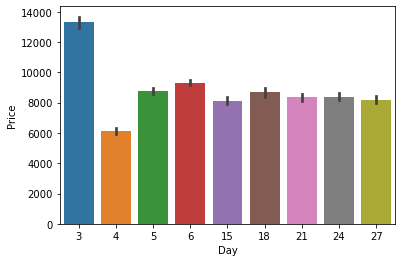

In [49]:
sns.barplot(x='Day', y='Price',data=FPtrain)

<AxesSubplot:xlabel='Month', ylabel='Price'>

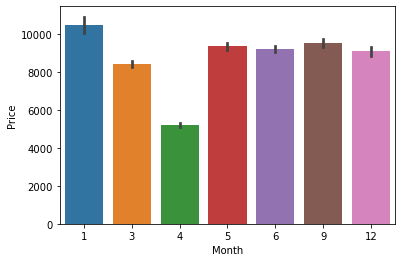

In [50]:
sns.barplot(x='Month', y='Price',data=FPtrain)

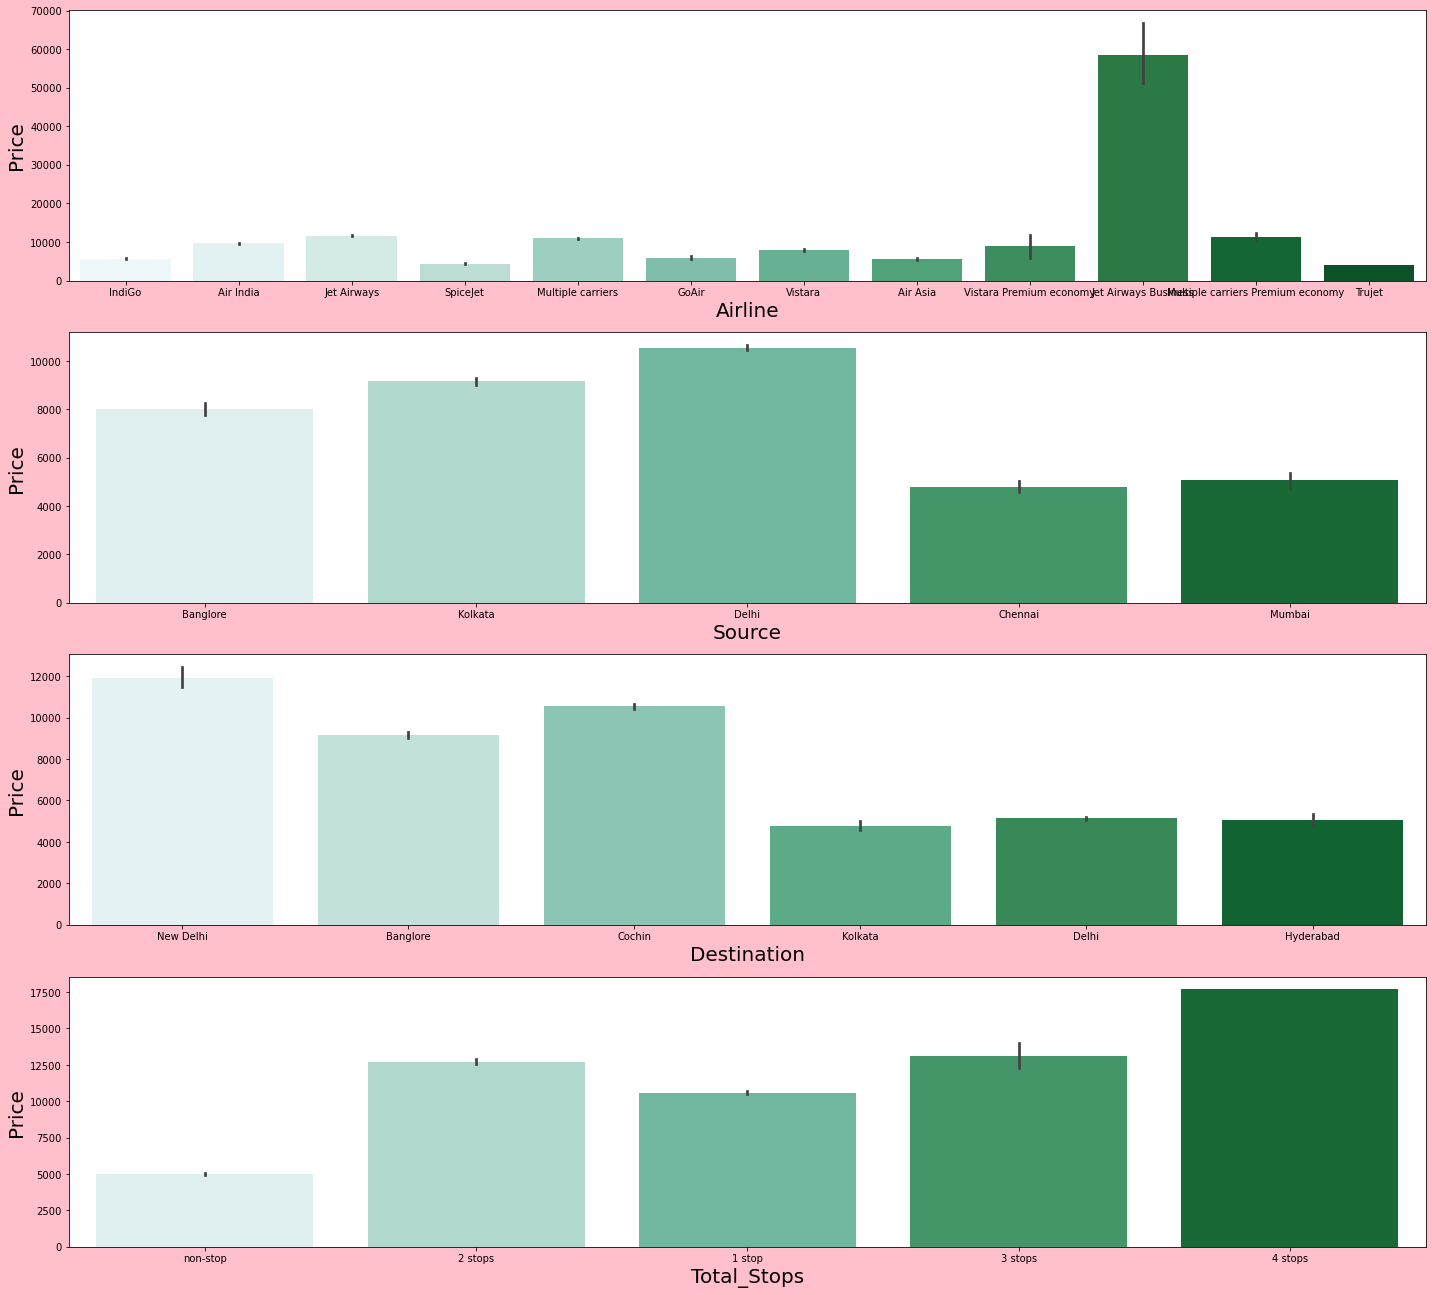

In [51]:
plt.figure(figsize=(20,22),facecolor='pink')
plotnum=1
y=FPtrain['Price']
x=FPtrain.drop(columns=['Price','Month','Day','Route','Dep_Time','Arrival_Time','Duration'])
for k in x:
    if plotnum<=5:
        plt.subplot(5,1,plotnum)
        sns.barplot(x[k],y, palette="BuGn")
        plt.xlabel(k,fontsize=20)        
        plt.ylabel('Price',fontsize=20)
    plotnum+=1
plt.tight_layout()

##### From the above graphs we can find that:

- Jet Airways has the costliest flights.
- Delhi as source from flights are costliest.
- New Delhi bound flights are costliest.
- More number of stops flights are having higher Price.

##### Geting relationship of "Duration" with "Price"

In [52]:
FPtrain.Duration.head(50)

0      2h 50m
1      7h 25m
2         19h
3      5h 25m
4      4h 45m
5      2h 25m
6     15h 30m
7      21h 5m
8     25h 30m
9      7h 50m
10    13h 15m
11     2h 35m
12     2h 15m
13    12h 10m
14     2h 35m
15    26h 35m
16     4h 30m
17    22h 35m
18        23h
19    20h 35m
20     5h 10m
21    15h 20m
22     2h 50m
23     2h 55m
24    13h 20m
25    15h 10m
26     5h 45m
27     5h 55m
28     2h 50m
29     2h 15m
30     2h 15m
31    13h 25m
32     2h 50m
33        22h
34     5h 30m
35    10h 25m
36     5h 15m
37     2h 30m
38     6h 15m
39    11h 55m
40     11h 5m
41     8h 30m
42     22h 5m
43     2h 45m
44        12h
45     2h 50m
46     2h 50m
47     2h 15m
48     16h 5m
49    19h 55m
Name: Duration, dtype: object

In [53]:
dur=FPtrain['Duration'].tolist()


##### Converting Duration into numeric values:

In [54]:
for i in range(0,len(dur)):
    dur[i]=dur[i].replace("h","*60").replace(" ","+").replace("m","")

In [55]:
for i in range(0,len(dur)):
    dur[i]= eval(dur[i])

##### Merging the new column in the Dataset:

In [56]:
durdf= pd.DataFrame({"Duration(min)":dur})

In [57]:
durdf.index=FPtrain.index

In [58]:
FPtrain['Duration(min)']=durdf['Duration(min)']

In [59]:
FPtrain.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Duration(min)
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,3,1,285


##### Droping "Duration" as it has been replaced by "Duration(min)":

In [60]:
FPtrain.drop(columns=['Duration'],inplace=True)

In [61]:
FPtrain.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Month,Duration(min)
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,13302,3,1,285


##### Getting relationship b/w "Price" with "Duration(min)":

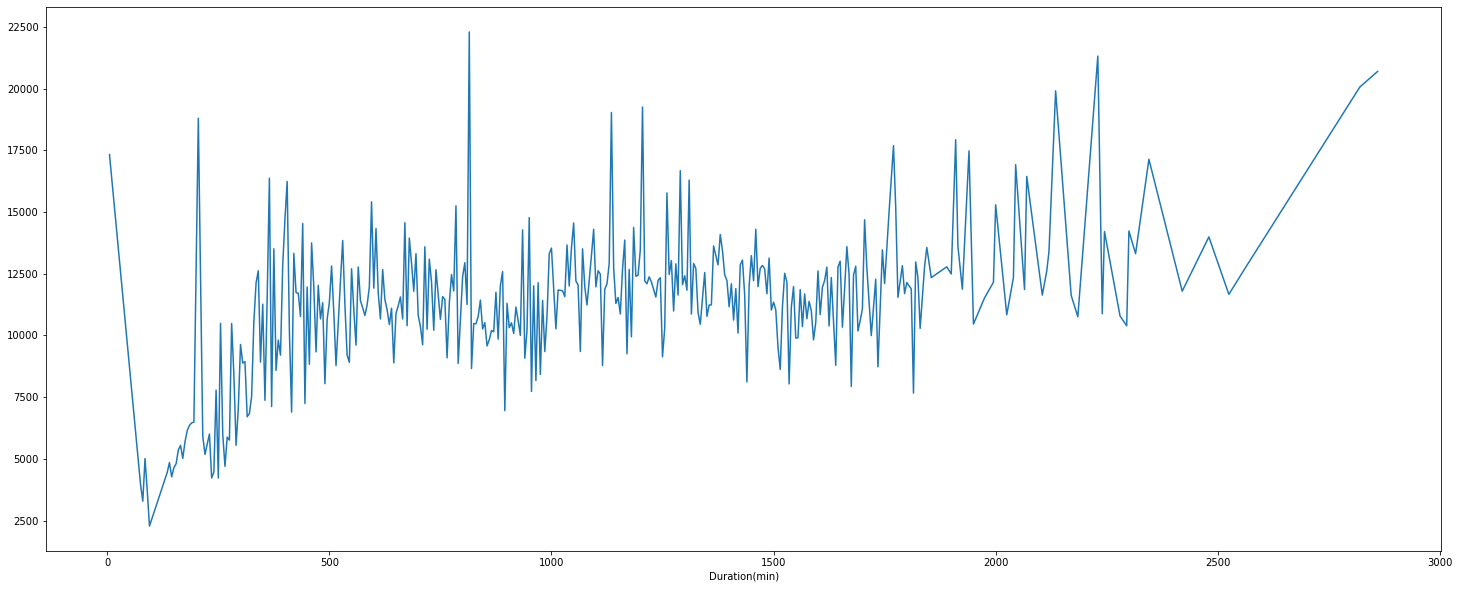

In [62]:
plt.figure(figsize=(25,10))
FPtrain.groupby('Duration(min)').mean()['Price'].plot()
plt.title=('Price Variation')

##### Droping columns which are no longer required as other column values convey the same data:

- Droping <b>"Route"</b> since "Source" + "Destination" + "Total_Stop" gives the same info
- Droping <b>"Dep_Time"</b> and <b>"Arrival_Time"</b> is covered under "Duration(min)"

In [63]:
FPtrain.drop(columns=["Route","Dep_Time","Arrival_Time"],inplace=True)

In [64]:
FPtrain.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Duration(min)
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,285


##### Checking for outliers

<AxesSubplot:xlabel='Duration(min)'>

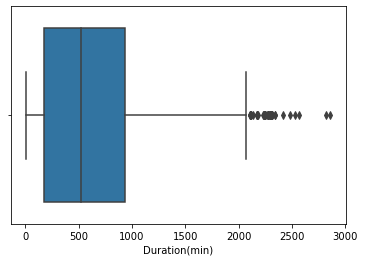

In [65]:
sns.boxplot(FPtrain['Duration(min)'])

`Outliers are Present in "Duration(min)"`

<AxesSubplot:xlabel='Day'>

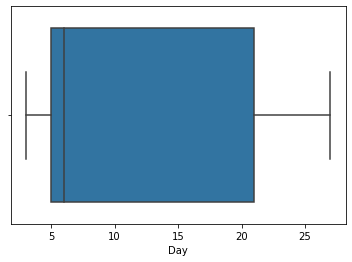

In [66]:
sns.boxplot(FPtrain['Day'])

<AxesSubplot:xlabel='Month'>

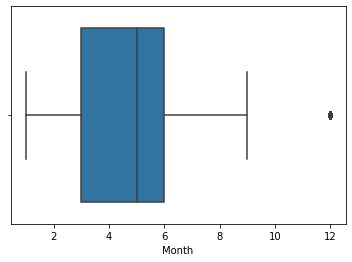

In [67]:
sns.boxplot(FPtrain['Month'])

### Removing Outliers:

#### Using Z Score method:

In [68]:
df=FPtrain[['Duration(min)']].copy()

In [69]:
from scipy.stats import zscore
zscor= zscore(df)
z_score_abs=np.abs(zscor)

df2=df[(z_score_abs < 3).all(axis=1)]

In [70]:
df2.shape

(10616, 1)

In [71]:
df.shape

(10682, 1)

`Data loss %`


In [72]:
loss= (10682-10616)/10682*100
loss

0.6178618236285339

`Loss % is within acceptable range`

#### Using IQR method:


In [73]:
df=FPtrain[['Duration(min)']].copy()

In [76]:
indxdrop= np.array([])
for k in df:
    q1= df[k].quantile(0.25)
    q3=df[k].quantile(0.75)
    iqr = q3-q1
    upperval=q3+(1.5*iqr)
    lowerval=q1-(1.5*iqr)
    col=df[k]
    indx= col[(col > upperval) | (col < lowerval)].index
    indxdrop= np.append(indxdrop, indx)

In [77]:
df = df.drop(indxdrop)

In [78]:
df.shape

(10609, 1)

In [79]:
# Data loss:
loss=(10682-10609)/10682*100
loss

0.6833926231042875

##### using Z score method to reduce outliers since it has a low data loss %

In [81]:
dropindx= FPtrain.index.difference(df2.index)

In [82]:
dropindx

Int64Index([  226,   553,   966,   969,  1067,  1113,  1346,  1442,  1496,
             1551,  1657,  1791,  1804,  2172,  2553,  2641,  2654,  2718,
             3457,  3790,  3815,  3966,  4047,  4118,  4463,  4655,  5516,
             5701,  5711,  5782,  5933,  5953,  6059,  6085,  6321,  6476,
             6884,  7189,  7232,  7306,  7329,  7553,  7611,  7612,  7876,
             7906,  8127,  8153,  8360,  8409,  8412,  8601,  8621,  8698,
             8729,  9246,  9395,  9483,  9550,  9672,  9702,  9847, 10019,
            10325, 10455, 10638],
           dtype='int64')

In [83]:
FPtrain.drop(dropindx,inplace=True)

In [84]:
FPtrain.reset_index(drop=True,inplace=True)

In [87]:
FPtrain

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Duration(min)
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,170
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,285
...,...,...,...,...,...,...,...,...
10611,Air Asia,Kolkata,Banglore,non-stop,4107,4,9,150
10612,Air India,Kolkata,Banglore,non-stop,4145,27,4,155
10613,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,180
10614,Vistara,Banglore,New Delhi,non-stop,12648,3,1,160


<AxesSubplot:xlabel='Duration(min)'>

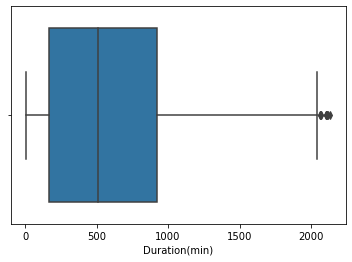

In [89]:
sns.boxplot(FPtrain['Duration(min)'])

##### Many outlliers have bee removed.

In [91]:
FPtrain['Duration(min)'].skew()

0.7745762809858823

##### Normalizing Data distribution using Power Transformer

In [92]:
from sklearn.preprocessing import PowerTransformer

In [94]:
pwrtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [95]:
df4= FPtrain[['Duration(min)']]

In [97]:
transformed=pwrtrans.fit_transform(df4)

In [98]:
type(transformed)

numpy.ndarray

In [99]:
transformed= pd.DataFrame(transformed, columns=df4.columns)

In [100]:
transformed.skew()

Duration(min)   -0.049276
dtype: float64

In [101]:
transformed.index=FPtrain.index

In [102]:
FPtrain[['Duration(min)']]= transformed[['Duration(min)']]

In [103]:
FPtrain['Duration(min)'].skew()

-0.04927558880390725

<AxesSubplot:xlabel='Duration(min)'>

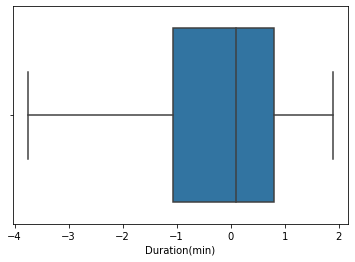

In [104]:
sns.boxplot(FPtrain['Duration(min)'])

Skewness has been removed

## Encoding categorical Columns

In [105]:
FPtrain

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Duration(min)
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,-1.058987
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,-0.050628
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,1.066294
3,IndiGo,Kolkata,Banglore,1 stop,6218,5,12,-0.394137
4,IndiGo,Banglore,New Delhi,1 stop,13302,3,1,-0.533541
...,...,...,...,...,...,...,...,...
10611,Air Asia,Kolkata,Banglore,non-stop,4107,4,9,-1.180901
10612,Air India,Kolkata,Banglore,non-stop,4145,27,4,-1.149160
10613,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,-1.002626
10614,Vistara,Banglore,New Delhi,non-stop,12648,3,1,-1.118294


`Encoding using get_dummies()`

In [106]:
dum=pd.get_dummies(FPtrain[['Airline','Source','Destination','Total_Stops']],drop_first=False)

In [107]:
dum

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10611,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10612,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10613,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
10614,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [108]:
FPtrain=FPtrain.join(dum)

In [109]:
FPtrain.drop(columns=['Airline','Source','Destination','Total_Stops'],inplace=True)

In [110]:
FPtrain

,Price,Day,Month,Duration(min),Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,3897,24,3,-1.058987,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,7662,5,1,-0.050628,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,13882,6,9,1.066294,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,6218,5,12,-0.394137,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,13302,3,1,-0.533541,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10611,4107,4,9,-1.180901,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10612,4145,27,4,-1.149160,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10613,7229,27,4,-1.002626,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
10614,12648,3,1,-1.118294,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


### Getting Correlations

In [111]:
df_corr=FPtrain.corr()

In [112]:
df_corr

,Price,Day,Month,Duration(min),Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
Price,1.000000,-0.163800,0.012569,0.597807,-0.132746,0.046805,-0.094883,-0.360424,0.417703,0.254293,...,0.269770,-0.313008,-0.231394,-0.179013,0.189667,0.351768,0.316820,0.059517,0.018149,-0.613766
Day,-0.163800,1.000000,-0.264537,-0.042612,0.009073,-0.035450,0.002286,0.013023,-0.029883,-0.026191,...,0.112955,0.011342,-0.012768,0.012148,-0.097926,-0.046861,0.016578,-0.023443,-0.010690,0.040563
Month,0.012569,-0.264537,1.000000,0.072402,0.000413,-0.000517,-0.017752,-0.037931,0.059543,-0.026823,...,0.008446,0.008451,-0.016971,-0.015271,-0.099360,0.028432,0.043202,0.015963,-0.014736,-0.063499
Duration(min),0.597807,-0.042612,0.072402,1.000000,-0.098619,0.192739,-0.078992,-0.359689,0.325384,-0.005490,...,0.400066,-0.386143,-0.377941,-0.241239,0.017669,0.498271,0.416660,0.059425,0.015893,-0.842692
Airline_Air Asia,-0.132746,0.009073,0.000413,-0.098619,1.000000,-0.076991,-0.024014,-0.086183,-0.132204,-0.004186,...,-0.060989,0.056181,-0.046586,-0.033959,-0.019262,-0.044248,-0.056091,-0.009678,-0.001708,0.089376
Airline_Air India,0.046805,-0.035450,-0.000517,0.192739,-0.076991,1.000000,-0.059679,-0.214181,-0.328551,-0.010402,...,-0.005380,-0.065859,0.023211,-0.049915,0.052816,-0.186801,0.362335,0.088265,0.022189,-0.078462
Airline_GoAir,-0.094883,0.002286,-0.017752,-0.078992,-0.024014,-0.059679,1.000000,-0.066805,-0.102478,-0.003244,...,-0.008331,0.099601,-0.036111,-0.026324,0.017587,-0.001117,-0.054633,-0.007502,-0.001324,0.042222
Airline_IndiGo,-0.360424,0.013023,-0.037931,-0.359689,-0.086183,-0.214181,-0.066805,1.000000,-0.367778,-0.011644,...,-0.077840,0.089346,0.059393,0.141449,-0.018815,-0.140874,-0.182938,-0.026924,-0.004752,0.287286
Airline_Jet Airways,0.417703,-0.029883,0.059543,0.325384,-0.132204,-0.328551,-0.102478,-0.367778,1.000000,-0.017862,...,-0.019659,-0.052231,-0.025120,-0.144918,0.058124,0.198937,0.080649,-0.041300,-0.007290,-0.265623
Airline_Jet Airways Business,0.254293,-0.026191,-0.026823,-0.005490,-0.004186,-0.010402,-0.003244,-0.011644,-0.017862,1.000000,...,-0.004265,-0.008746,-0.006294,-0.004588,0.048802,0.006518,0.013447,-0.001308,-0.000231,-0.016646


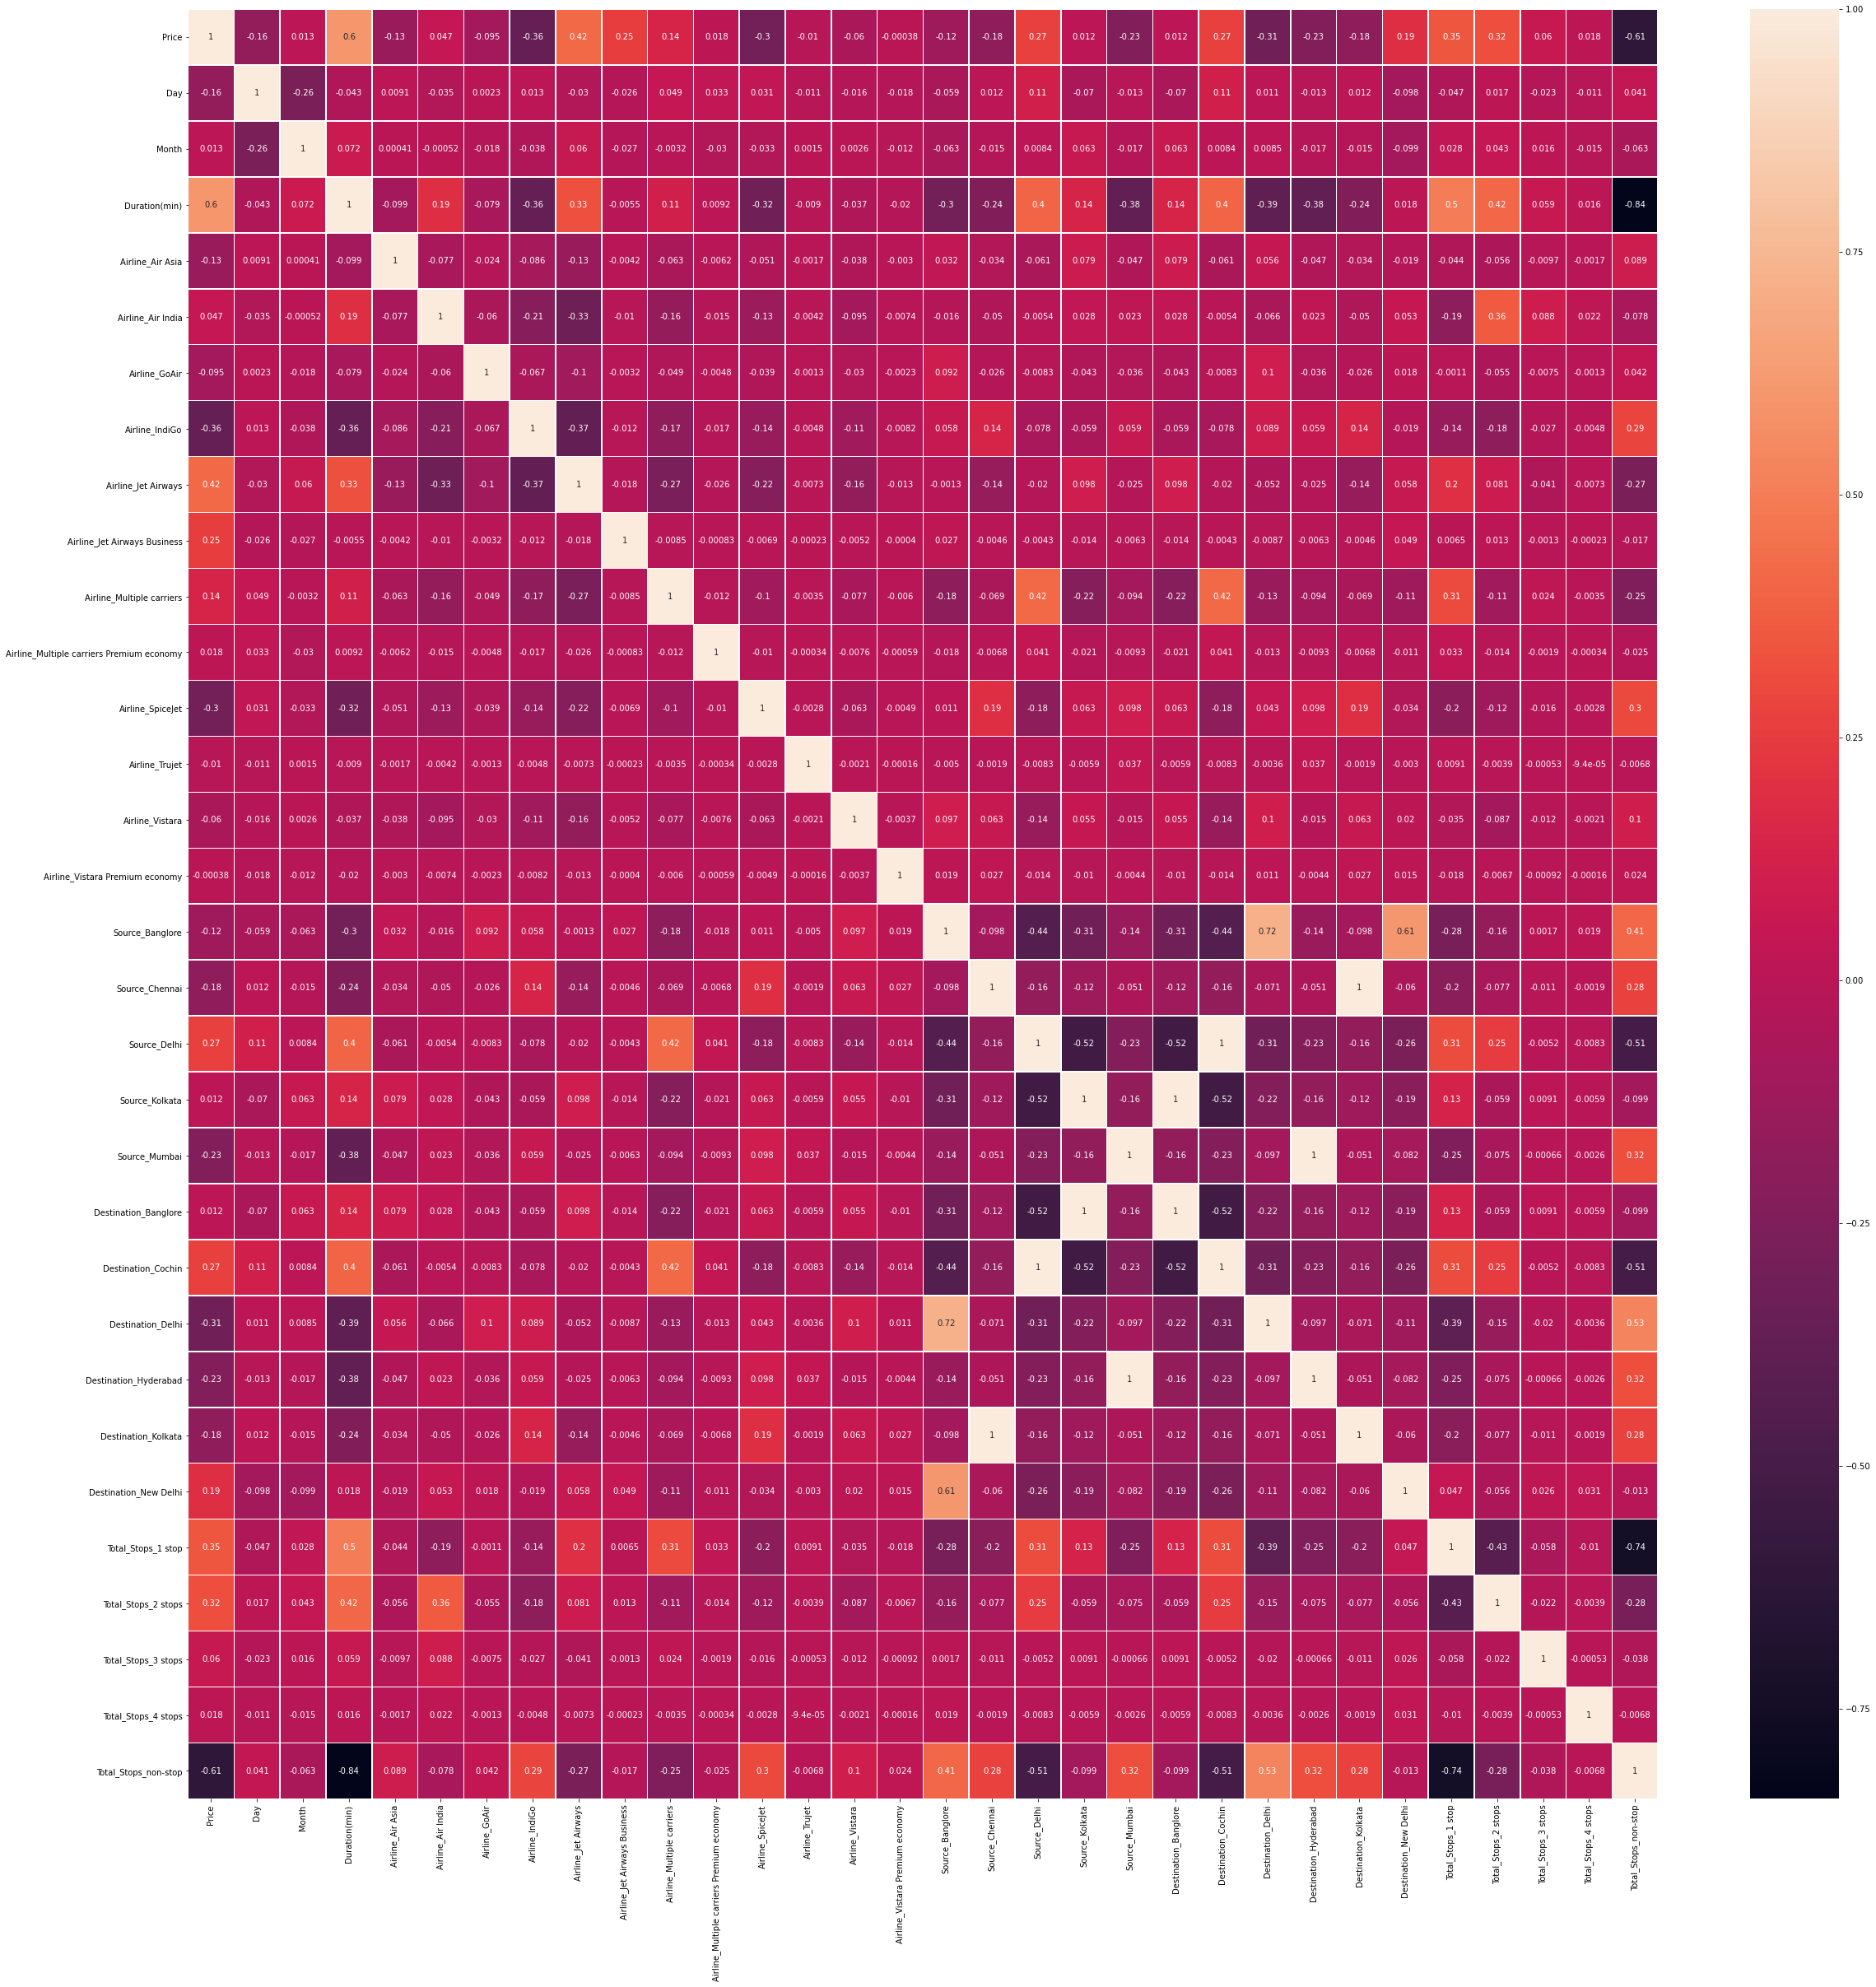

In [119]:
plt.figure(figsize=(40,40))
sns.heatmap(df_corr,annot=True,linewidth=0.5)
plt.show()

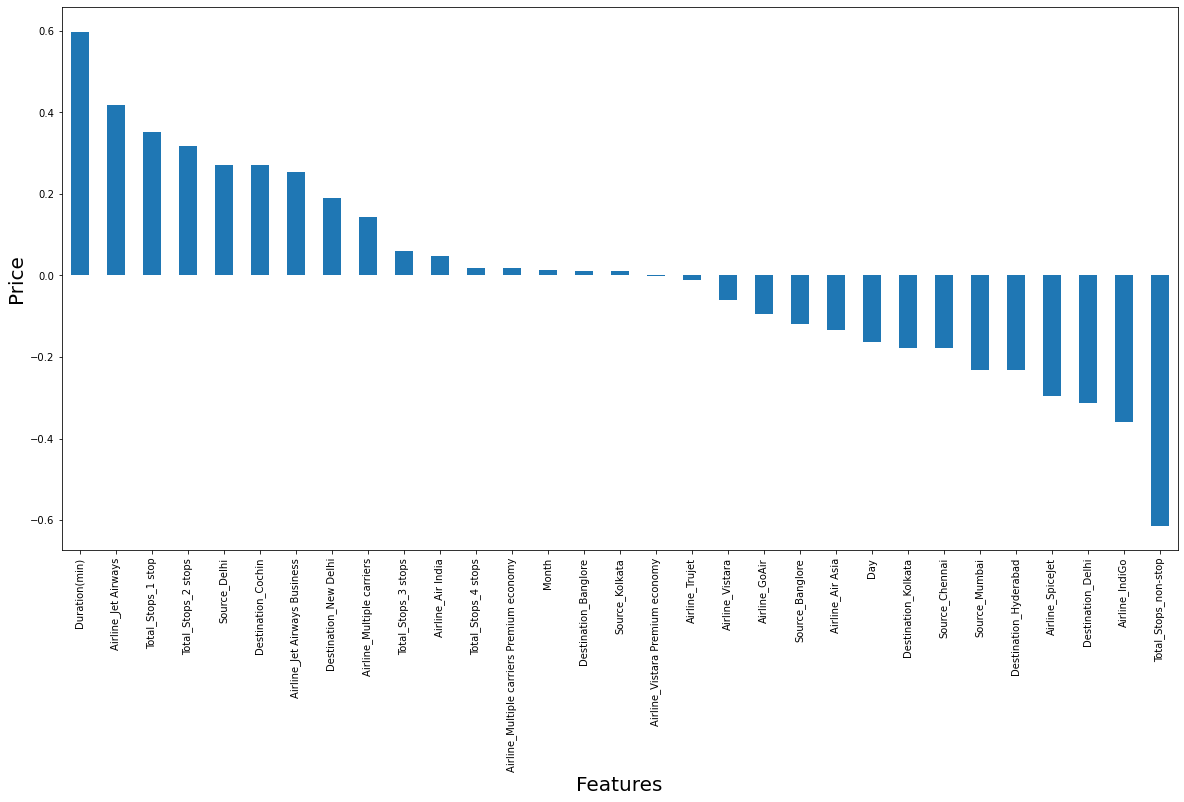

In [125]:
# Correlation of feature columns with Target column:
plt.figure(figsize=(20,10))
FPtrain.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind="bar")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

`Above plot shows` 
- Duration has highest positive correlation with Price.
- Total_Stops_non_stop has highest negetive correlation with Price.

### Feature selection:

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
x = FPtrain.drop(columns= ['Price'])
y= FPtrain['Price']

In [129]:
scaler= StandardScaler()
Scaled_x= scaler.fit_transform(x)

### Checking Multicollinearity using VIF:

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
vif= pd.DataFrame()

In [134]:
vif['Features']= x.columns
vif['vif']= [variance_inflation_factor(Scaled_x,i) for i in range (Scaled_x.shape[1])]

In [135]:
vif

,Features,vif
0,Day,1.115612
1,Month,1.104883
2,Duration(min),4.957407
3,Airline_Air Asia,inf
4,Airline_Air India,inf
5,Airline_GoAir,inf
6,Airline_IndiGo,inf
7,Airline_Jet Airways,inf
8,Airline_Jet Airways Business,inf
9,Airline_Multiple carriers,inf


In [136]:
# Doing Principal Component Analysis:
from sklearn.decomposition import PCA

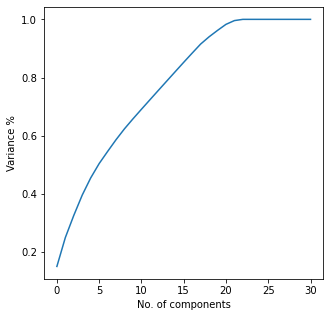

In [142]:
pca=PCA()
pc=pca.fit_transform(Scaled_x)
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of components')
plt.ylabel('Variance %')
plt.show()

`20 components have 97 % variance in the data`

In [143]:
# Selecting KBest Features:
from sklearn.feature_selection import  SelectKBest, f_classif

In [145]:
bf= SelectKBest(score_func =f_classif, k= 'all')
fit= bf.fit(x,y)
dfscore= pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame(x.columns)

In [148]:
fit= bf.fit(x,y)
dfscore=pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame(x.columns)
dfcolumns.head()
featureS=pd.concat([dfcolumns,dfscore],axis=1)
featureS.columns=['Features','Score']
print(featureS.nlargest(32,'Score'))

                                     Features       Score
10  Airline_Multiple carriers Premium economy         inf
29                        Total_Stops_4 stops         inf
14            Airline_Vistara Premium economy         inf
8                Airline_Jet Airways Business         inf
12                             Airline_Trujet         inf
30                       Total_Stops_non-stop  417.291686
7                         Airline_Jet Airways  380.865480
13                            Airline_Vistara  347.421557
21                         Destination_Cochin  246.528180
17                               Source_Delhi  246.528180
15                            Source_Banglore  235.066127
9                   Airline_Multiple carriers  226.977214
19                              Source_Mumbai  224.672568
23                      Destination_Hyderabad  224.672568
18                             Source_Kolkata  220.360379
20                       Destination_Banglore  220.360379
16            

#### Selecting Best features based on the score above:

In [152]:
best= x.drop(columns=['Airline_Multiple carriers Premium economy','Total_Stops_4 stops','Airline_Vistara Premium economy','Airline_Jet Airways Business','Airline_Trujet']).copy()

In [154]:
scaled_best= scaler.fit_transform(best)

#### Based on the Target column Data Type this problem is based on Regression type

In [155]:
from sklearn.model_selection import train_test_split

In [157]:
from sklearn.metrics import r2_score

In [158]:
from xgboost import XGBRegressor
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaled_best,y,test_size = .25, random_state = i)
    modRF =  XGBRegressor()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.8166691196091693 on random_state: 64


In [159]:
x_train,x_test,y_train,y_test = train_test_split(scaled_best,y,test_size = .25, random_state =64)

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [161]:
from sklearn.metrics import r2_score,mean_squared_error

In [162]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
xg = XGBRegressor()
SV= SVR()
r=Ridge()

In [164]:
# Training the Models:
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
SV.fit(x_train,y_train)
r.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor()

## Ridge Regression Model:

In [165]:
y_r_pred = r.predict(x_test)

#### R2 Score

In [166]:
r2_score(y_test,y_r_pred)

0.584689486945045

#### Mean Squared Error:

In [167]:
mean_squared_error(y_test,y_r_pred)

8897085.626179557

#### Root Mean Squared Error:

In [168]:
np.sqrt(mean_squared_error(y_test,y_r_pred))

2982.7982878799494

## Random Forest Regression Model:

In [169]:
y_rf_pred = rf.predict(x_test)

#### R2 Score:

In [170]:
r2_score(y_test,y_rf_pred)

0.7838278074484718

#### Mean Squared Error:

In [171]:
mean_squared_error(y_test,y_rf_pred)

4630998.847061268

#### Root Mean Squared Error:

In [172]:
np.sqrt(mean_squared_error(y_test,y_rf_pred))

2151.975568416442

## XGB Regression Model:

In [173]:
y_xg_pred = xg.predict(x_test)

#### R2 Score:

In [174]:
r2_score(y_test,y_xg_pred)

0.8166691196091693

#### Mean Squared Error:

In [175]:
mean_squared_error(y_test,y_xg_pred)

3927448.2332795407

#### Root Mean Squared Error:

In [176]:
np.sqrt(mean_squared_error(y_test,y_xg_pred))

1981.7790576347154

## Support Vector Regression Model:

In [177]:
y_svr_pred = SV.predict(x_test)

#### R2 Score:

In [178]:
r2_score(y_test,y_svr_pred)

0.07553216792026807

#### Mean Squared Error:

In [179]:
mean_squared_error(y_test,y_svr_pred)

19804626.182370666

#### Root Mean Squared Error:

In [180]:
np.sqrt(mean_squared_error(y_test,y_svr_pred))

4450.2388904833715

## Decision Tree Regression Model:

In [181]:
y_dt_pred = dt.predict(x_test)

#### R2 Score:

In [182]:
r2_score(y_test,y_dt_pred)

0.6847397878736129

#### Mean Squared Error:

In [185]:
mean_squared_error(y_test,y_dt_pred)

6753734.889068037

#### Root Mean Squared Error:

In [186]:
np.sqrt(mean_squared_error(y_test,y_dt_pred))

2598.7948916888454

## `Model Cross Validation:`

In [187]:
from sklearn.model_selection import ShuffleSplit,cross_val_score

#### Ridge Regression:

In [188]:
cross_val_score(r,scaled_best,y,cv=5).mean()

0.5783596840926114

#### Random Forest Regression:

In [190]:
cross_val_score(rf,scaled_best,y,cv=5).mean()

0.7268372700706475

#### XGB Regression:

In [191]:
cross_val_score(xg,scaled_best,y,cv=5).mean()

0.7827606488633125

#### SV Regression:

In [192]:
cross_val_score(SV,scaled_best,y,cv=5).mean()

0.07940244902086904

#### Decision Tree Regression:

In [194]:
cross_val_score(dt,scaled_best,y,cv=5).mean()

0.5978042005894869

## Based on comparing Accuracy Score results with Cross Validation results, it is determined that XGB Regressor is the best model. It also has the lowest Root Mean Squared Error score

## Hyper Parameter Tuning:

In [195]:
from sklearn.model_selection import GridSearchCV

In [196]:
parameter = {'booster':["gbtree","gblinear"],'eta': [0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [201]:
GridCV = GridSearchCV(XGBRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [202]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [203]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'max_depth': 10,
 'min_child_weight': 4,
 'subsample': 1}

In [204]:
Best_mod = XGBRegressor(booster = 'gbtree',eta = 0.1, max_depth= 10, min_child_weight = 4,subsample = 1)
Best_mod.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=10,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [205]:
xgbpred = Best_mod.predict(x_test)
acc = r2_score(y_test,xgbpred)
print(acc*100)

82.53632427228445


### XGB Regressor has an accuracy of 82.53%

### Saving The Model:

In [206]:
import joblib
joblib.dump(Best_mod,"BestFlight.pkl")

['BestFlight.pkl']

## Preparing the Test Dataset:

In [207]:
FPtest

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [209]:
FPtest.drop(columns=['Route','Additional_Info'],inplace=True)

In [210]:
FPtest['Date_of_Journey']=pd.to_datetime(FPtest['Date_of_Journey'])

In [211]:
FPtest['Day']=FPtest['Date_of_Journey'].apply(lambda d:d.day)

In [212]:
FPtest['Month']=FPtest['Date_of_Journey'].apply(lambda m:m.month)

In [213]:
FPtest.drop(columns = ['Date_of_Journey'],inplace = True)

In [214]:
duration = FPtest['Duration'].tolist()

In [215]:
for i in range(0,len(duration)):
    duration[i] = duration[i].replace("h","*60").replace(" ","+").replace("m","") #replacing 'h' with *60, whitespace with "+" and removing "m"

In [216]:
for i in range(0,len(duration)):
    duration[i] = eval(duration[i])

In [217]:
dur_df = pd.DataFrame({"Duration(mins)":duration})

In [218]:
dur_df.index = FPtest.index

In [219]:
FPtest['Duration(mins)'] = dur_df['Duration(mins)']

In [220]:
FPtest.drop(columns = ['Duration'],inplace=True)

In [221]:
FPtest.drop(columns = ['Dep_Time','Arrival_Time'],inplace=True)

In [222]:
df2 =FPtest[['Duration(mins)']].copy()

In [223]:
from scipy.stats import zscore
zscor = zscore(df2)
z_score_abs = np.abs(zscor)

df3 = df2[(z_score_abs < 3).all(axis=1)] #taking 3 as threshold value

In [224]:
dropindx = FPtest.index.difference(df3.index)

In [225]:
FPtest.reset_index(drop=True,inplace = True) #resetting the index of the dataframe

In [226]:
from sklearn.preprocessing import PowerTransformer

In [227]:
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [228]:
df4 = FPtest[['Duration(mins)']]

In [229]:
transformed= powtrans.fit_transform(df4)

In [230]:
transformed = pd.DataFrame(transformed, columns=df4.columns) #to convert numpy array back into dataframe

In [231]:
transformed.index = FPtest.index

In [232]:
FPtest[['Duration(mins)']] = transformed[['Duration(mins)']]

In [233]:
dumm = pd.get_dummies(FPtest[['Airline','Source','Destination','Total_Stops']],drop_first = False)

In [234]:
FPtest = FPtest.join(dumm)

In [235]:
FPtest.drop(columns = ['Airline','Source','Destination','Total_Stops'],inplace=True)

In [236]:
x_best = FPtest.drop(columns=['Airline_Multiple carriers Premium economy','Total_Stops_4 stops','Airline_Vistara Premium economy','Airline_Jet Airways Business']).copy()

In [237]:
scaled_x_best = scaler.fit_transform(x_best)

## Loading The Model:

In [238]:
mod=joblib.load("BestFlight.pkl")

In [239]:
print(mod.predict(scaled_x_best))

[11567.12    4593.6274 12980.077  ... 15072.323  12636.3    10171.34  ]


In [240]:
Prediction_accuracy = pd.DataFrame({'Predictions': mod.predict(scaled_x_best), 'Actual Values': y[0:2671]})
Prediction_accuracy.head(20)

,Predictions,Actual Values
0,11567.120117,3897
1,4593.627441,7662
2,12980.077148,13882
3,10131.211914,6218
4,3862.854736,13302
5,11167.079102,3873
6,10594.271484,11087
7,8871.871094,22270
8,4644.730469,11087
9,12064.024414,8625
